In [5]:
#!pip install pyspark

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
dataframe = pd.read_csv("kc_house_data.csv", header='infer')
list(dataframe)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
dataframe.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

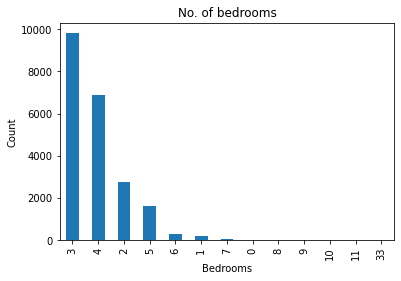

In [11]:
dataframe['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'No. of bedrooms')

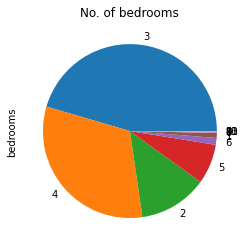

In [12]:
dataframe['bedrooms'].value_counts().plot(kind='pie')
plt.title('No. of bedrooms')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

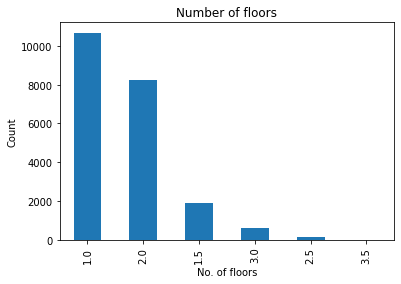

In [13]:
dataframe['floors'].value_counts().plot(kind='bar')
plt.title('Number of floors')
plt.xlabel('No. of floors')
plt.ylabel('Count')
sns.despine

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

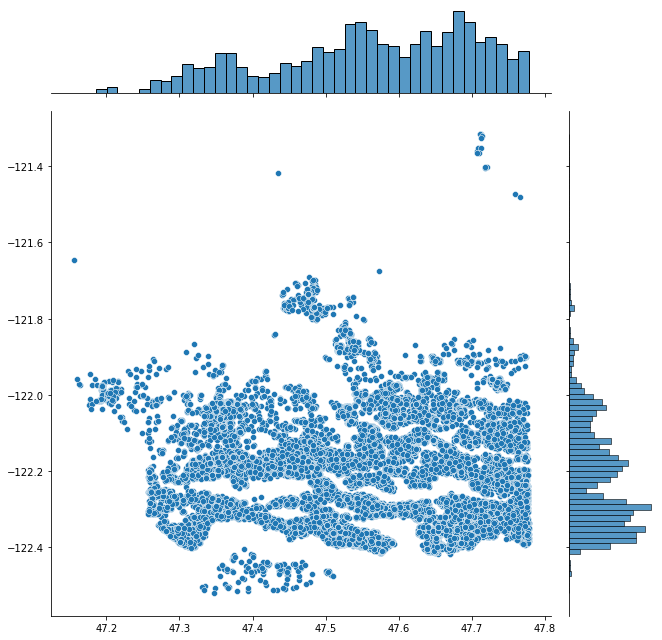

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,20))
sns.jointplot(x=dataframe.lat.values, y=dataframe.long.values, size=9)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

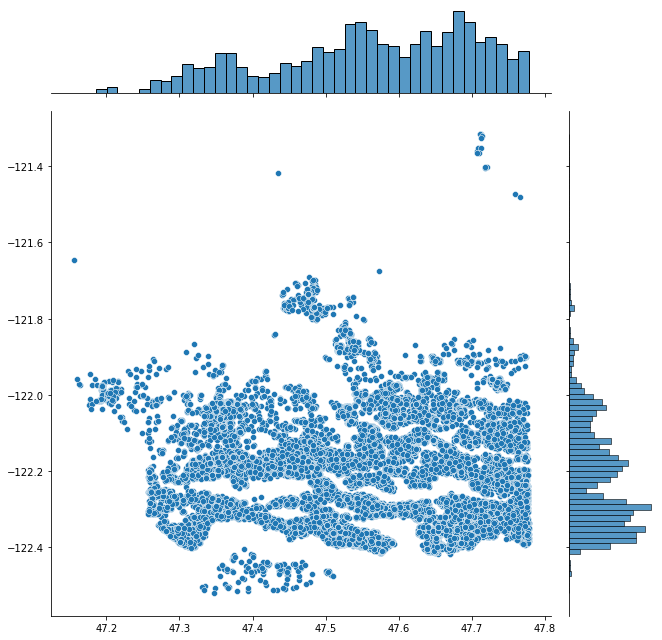

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,20))
sns.jointplot(x=dataframe.lat.values, y=dataframe.long.values, size=9)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()
sns.despine()

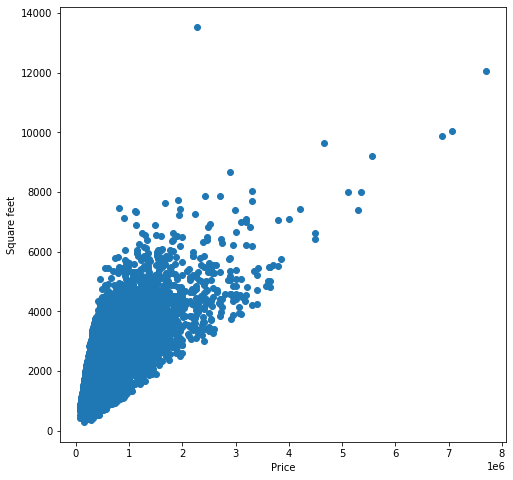

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(dataframe.price, dataframe.sqft_living)
plt.xlabel('Price')
plt.ylabel('Square feet')
plt.show()

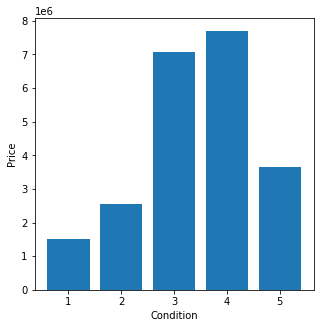

In [17]:
plt.figure(figsize=(5,5))
plt.bar(dataframe.condition, dataframe.price)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

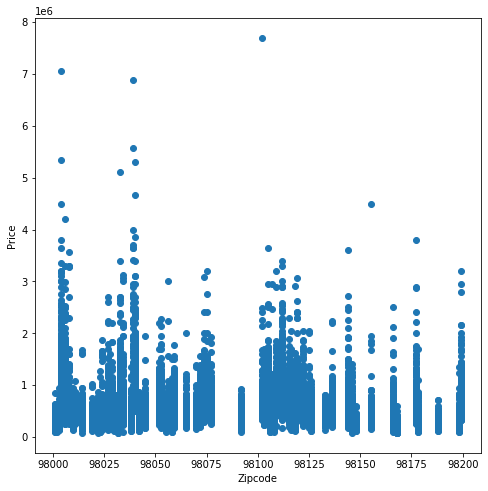

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(dataframe.zipcode, dataframe.price)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.show()

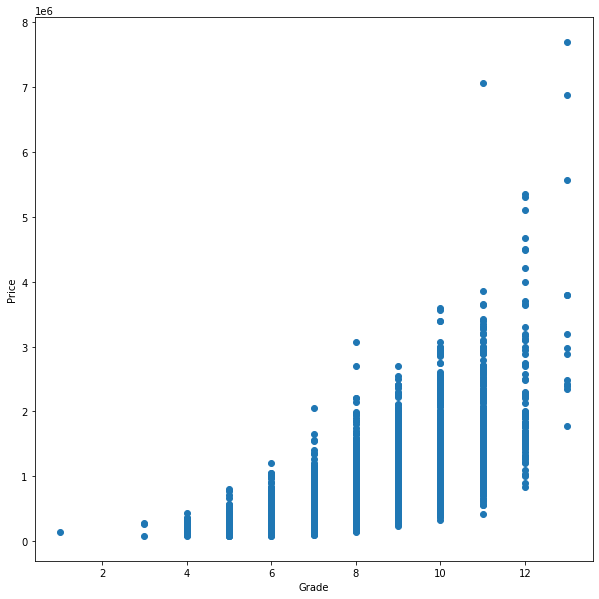

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(dataframe.grade, dataframe.price)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [20]:
x_df = dataframe.drop(['id','date',], axis = 1)
x_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
y = dataframe[['price']].copy()
y_df = pd.DataFrame(y)
y_df

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [22]:
print('Price Vs Bedrooms: %s' % x_df['price'].corr(x_df['bedrooms']))
print('Price Vs Bathrooms: %s' % x_df['price'].corr(x_df['bathrooms']))
print('Price Vs Living Area: %s' % x_df['price'].corr(x_df['sqft_living']))
print('Price Vs Plot Area: %s' % x_df['price'].corr(x_df['sqft_lot']))
print('Price Vs No. of floors: %s' % x_df['price'].corr(x_df['floors']))
print('Price Vs Waterfront property: %s' % x_df['price'].corr(x_df['waterfront']))
print('Price Vs View: %s' % x_df['price'].corr(x_df['view']))
print('Price Vs Grade: %s' % x_df['price'].corr(x_df['grade']))
print('Price Vs Condition: %s' % x_df['price'].corr(x_df['condition']))
print('Price Vs Sqft Above: %s' % x_df['price'].corr(x_df['sqft_above']))
print('Price Vs Basement Area: %s' % x_df['price'].corr(x_df['sqft_basement']))
print('Price Vs Year Built: %s' % x_df['price'].corr(x_df['yr_built']))
print('Price Vs Year Renovated: %s' % x_df['price'].corr(x_df['yr_renovated']))
print('Price Vs Zipcode: %s' % x_df['price'].corr(x_df['zipcode']))
print('Price Vs Latitude: %s' % x_df['price'].corr(x_df['lat']))
print('Price Vs Longitude: %s' % x_df['price'].corr(x_df['long']))

Price Vs Bedrooms: 0.308349598145638
Price Vs Bathrooms: 0.525137505413962
Price Vs Living Area: 0.7020350546118003
Price Vs Plot Area: 0.08966086058710017
Price Vs No. of floors: 0.2567938875507184
Price Vs Waterfront property: 0.26636943403060226
Price Vs View: 0.39729348829450495
Price Vs Grade: 0.6674342560202365
Price Vs Condition: 0.03636178912899747
Price Vs Sqft Above: 0.6055672983560781
Price Vs Basement Area: 0.3238160207119833
Price Vs Year Built: 0.05401153149479269
Price Vs Year Renovated: 0.12643379344089314
Price Vs Zipcode: -0.05320285429832562
Price Vs Latitude: 0.30700347999521865
Price Vs Longitude: 0.021626241039306705


In [23]:
x_df.corr().iloc[:,-19]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


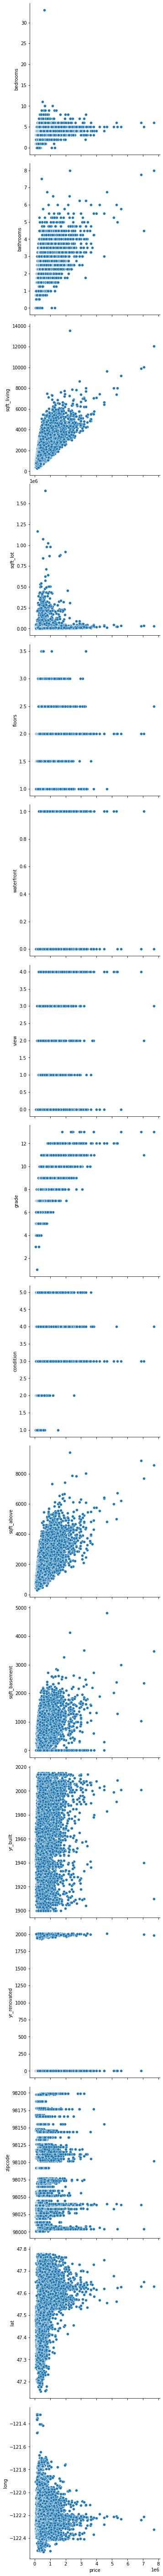

In [24]:
sns.pairplot(data=x_df,
       x_vars=['price'],
       y_vars=['bedrooms', 'bathrooms', 'sqft_living', 
           'sqft_lot', 'floors', 'waterfront','view',
           'grade','condition','sqft_above','sqft_basement',
           'yr_built','yr_renovated','zipcode','lat','long'],
       size = 5)

In [25]:
x_df2 = x_df.drop(['price'], axis = 1)

In [26]:
reg=linear_model.LinearRegression()

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_df2,y_df,test_size=0.4,random_state=4)

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
reg.coef_

array([[-3.51758560e+04,  4.15668761e+04,  1.09783333e+02,
         1.29887801e-01,  5.45361908e+03,  5.82967182e+05,
         5.25440940e+04,  2.73530896e+04,  9.41210868e+04,
         7.32738904e+01,  3.65094422e+01, -2.57413912e+03,
         2.41934076e+01, -5.41779815e+02,  6.05771594e+05,
        -2.15365692e+05,  1.99717345e+01, -3.58271235e-01]])

In [30]:
predictions=reg.predict(x_test)
predictions

array([[383196.16164233],
       [625423.86574602],
       [217225.69818282],
       ...,
       [315480.46820474],
       [551087.68524269],
       [453070.91474864]])

In [31]:
reg.score(x_test,y_test)

0.7037283753668728

In [32]:
!pip install xgboost
import xgboost

In [33]:
new_model = xgboost.XGBRegressor(n_estimators=750, learning_rate=0.01, gamma=0, 
                  subsample=0.55, colsample_bytree=1, max_depth=10)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
traindf, testdf = train_test_split(x_train, test_size = 0.2)
new_model.fit(x_train,y_train)

[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=10, n_estimators=750, subsample=0.55)

In [36]:
from sklearn.metrics import explained_variance_score

predictions = new_model.predict(x_test)
print(explained_variance_score(predictions,y_test))

0.8734298525492487
